# **DESAFIO DA SEMANA 2**

No site https://github.com/fivethirtyeight/data, são disponibilizados diversos arquivos csv de uso gratuito. Como desafio da semana, vocês deverão escolher pelo menos um dos arquivos disponibilizados nesse site, criar um notebook no Colab e desenvolver um programa que permita analisar os dados dos arquivos selecionados.

Recomendação: abusem do uso de funções e de estruturas que facilitem o reuso de suas implementações.


## **Seleção dos dados a processar**

Os dados selecionados correspondem a informações oficiais sobre ataques terroristas. Neste caso, utilizam-se os dados correspondentes ao número de ataques por país em 1993. O estudo dos dados será realizado para determinar quais foram os países com maior actividade terrorista e danos causados ​​à população.

Os dados utilizados podem ser encontrados em:
https://github.com/fivethirtyeight/data/tree/master/terrorism

**OBJETIVO**:
* Conhecer:
  * Os países com maior atividade terrorista.
  * Os países com maior número de mortos.
* Entender a distribuição das variaveís definidas nos dados processados.
* Visualizar com grafos o comportamento das variáveis.


#### **IMPORTAR BIBLIOTECAS**





In [ ]:
import pandas as pd
import matplotlib

#### **CARREGAR DADOS**

In [ ]:
url_arquivo = "https://raw.githubusercontent.com/fivethirtyeight/data/master/terrorism/country_stats_1993_appendix2.csv"
dados_carregados = pd.read_csv(url_arquivo, error_bad_lines=False)

# Verificar qual é o nome das colunas no arquivo carregado
print('Nome das colunas do arquivo carregado: \n')
print(list(dados_carregados.columns), '\n')

Nome das colunas do arquivo carregado: 

['Country', 'Number of Incidents', 'Percent', 'Number Killed', 'Number Injured', 'Number US Killed', 'Number US Injured'] 



In [ ]:
#Mudar os nomes das colunas
dados_carregados.columns = ['País', 'Número de incidentes', 'Porcentagem', 'Número de mortos', 'Número de feridos', 'Número de mortos nos EUA', 'Número de feridos nos EUA']
dados_carregados = dados_carregados.dropna() #head() #dropna()
dados_carregados

,País,Número de incidentes,Porcentagem,Número de mortos,Número de feridos,Número de mortos nos EUA,Número de feridos nos EUA
0,Afghanistan,20.0,0.40%,65.0,50.0,0.0,1.0
1,Albania,2.0,0.04%,0.0,2.0,0.0,0.0
2,Algeria,311.0,6.28%,602.0,126.0,0.0,0.0
3,Angola,34.0,0.69%,373.0,111.0,0.0,0.0
4,Antigua and Barbuda,1.0,0.02%,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
122,Venezuela,49.0,0.99%,2.0,13.0,0.0,0.0
123,Vietnam,2.0,0.04%,0.0,1.0,0.0,0.0
124,Yemen,23.0,0.46%,12.0,7.0,0.0,2.0
125,Yugoslavia,5.0,0.10%,1.0,5.0,0.0,0.0


## **Analise dos dados em geral**
#### **Estatística dos dados Carregados**

* Somatorias
* Médias 
* Desvio padrão
* Valores maximos
* Quantis

In [ ]:
print('Total de incidentes:',dados_carregados['Número de incidentes'].sum())
print('Total de mortos:',dados_carregados['Número de mortos'].sum())
print('Total de feridos:',dados_carregados['Número de feridos'].sum(),'\n')
dados_carregados.describe()

Total de incidentes: 4954.0
Total de mortos: 10162.0
Total de feridos: 12176.0 



,Número de incidentes,Número de mortos,Número de feridos,Número de mortos nos EUA,Número de feridos nos EUA
count,127.000000,127.000000,127.000000,127.000000,127.000000
mean,39.007874,80.015748,95.874016,0.354331,9.559055
std,78.069413,218.541049,281.409688,2.644334,93.528678
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,3.000000,5.000000,0.000000,0.000000
75%,31.000000,41.500000,50.000000,0.000000,0.000000
max,426.000000,1268.000000,2546.000000,28.000000,1048.000000


### **Distribuição e quatis dos dados**
Uso de quantil para conhecer onde fica a maior parte das mostras.
Uso de grafos para visualizar a distribuição dos dados.

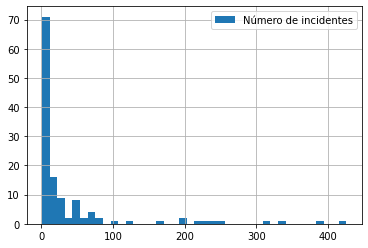

In [ ]:
dados_carregados['Número de incidentes'].hist(bins=40, legend=True)

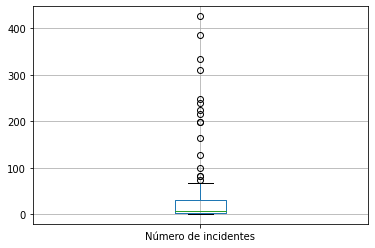

In [ ]:
dados_carregados.boxplot(['Número de incidentes'])#, 'Número de mortos', 'Número de feridos'])

In [ ]:
porcentagem = 0.9
quantile = dados_carregados['Número de incidentes'].quantile(porcentagem)
print(f'O {porcentagem*100}% dos paises tem um número de incidentes menor a {round(quantile,0)}')

O 90.0% dos paises tem um número de incidentes menor a 90.0


### **Países com maior atividade terrorista**

In [ ]:
dados_carregados.sort_values(by=['Número de incidentes'], ascending=False).head(5)

,País,Número de incidentes,Porcentagem,Número de mortos,Número de feridos,Número de mortos nos EUA,Número de feridos nos EUA
102,South Africa,426.0,8.60%,1009.0,631.0,1.0,0.0
117,Turkey,386.0,7.79%,1166.0,403.0,0.0,0.0
91,Peru,334.0,6.74%,316.0,307.0,0.0,0.0
2,Algeria,311.0,6.28%,602.0,126.0,0.0,0.0
54,India,249.0,5.03%,1219.0,2546.0,0.0,0.0


In [ ]:
dados_carregados.loc[dados_carregados['Número de mortos']>90] #len #index

,País,Número de incidentes,Porcentagem,Número de mortos,Número de feridos,Número de mortos nos EUA,Número de feridos nos EUA
2,Algeria,311.0,6.28%,602.0,126.0,0.0,0.0
18,Cambodia,216.0,4.36%,279.0,483.0,0.0,1.0
24,Colombia,225.0,4.54%,256.0,406.0,0.0,1.0
38,Egypt,127.0,2.56%,132.0,214.0,3.0,3.0
44,Germany,198.0,4.00%,27.0,181.0,0.0,5.0
54,India,249.0,5.03%,1219.0,2546.0,0.0,0.0
59,Israel,240.0,4.84%,142.0,297.0,0.0,0.0
85,Northern Ireland,165.0,3.33%,73.0,175.0,0.0,0.0
87,Pakistan,100.0,2.02%,228.0,302.0,0.0,0.0
91,Peru,334.0,6.74%,316.0,307.0,0.0,0.0


### **Países com maior número de mortos**

In [ ]:
dados_carregados.sort_values(by=['Número de mortos'], ascending=False).head(5)

,País,Número de incidentes,Porcentagem,Número de mortos,Número de feridos,Número de mortos nos EUA,Número de feridos nos EUA
105,Sri Lanka,29.0,0.59%,1268.0,380.0,0.0,0.0
54,India,249.0,5.03%,1219.0,2546.0,0.0,0.0
117,Turkey,386.0,7.79%,1166.0,403.0,0.0,0.0
102,South Africa,426.0,8.60%,1009.0,631.0,1.0,0.0
2,Algeria,311.0,6.28%,602.0,126.0,0.0,0.0


### **Países com maior número de feridos**


In [ ]:
dados_carregados.sort_values(by=['Número de feridos'], ascending=False).head(5)

,País,Número de incidentes,Porcentagem,Número de mortos,Número de feridos,Número de mortos nos EUA,Número de feridos nos EUA
54,India,249.0,5.03%,1219.0,2546.0,0.0,0.0
120,United States,28.0,0.57%,21.0,1066.0,0.0,1048.0
10,Bangladesh,47.0,0.95%,40.0,853.0,0.0,0.0
96,Russia,32.0,0.65%,203.0,841.0,1.0,5.0
102,South Africa,426.0,8.60%,1009.0,631.0,1.0,0.0


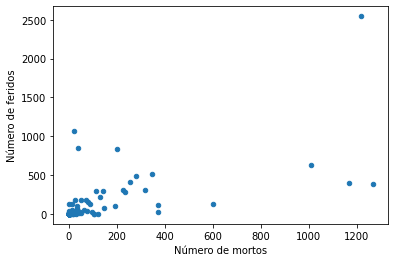

In [ ]:
# import matplotlib.pyplot as plt

# plt.scatter(dados_carregados['Número de mortos'],dados_carregados['Número de feridos'],)
# plt.xlabel('Número de mortos')
# plt.ylabel('Número de feridos')

dados_carregados.plot.scatter(x='Número de mortos', y='Número de feridos')

## **Concluções:**

* A maior quantidade de paises tem um numero de incidentes por baixo de 100.

* O país com maior atividade terrorista não é o país com maior número de mortos.

* A maioria dos paises com maior atividade terrorista são os que têm mais mortos.

* A maioria dos paises no top 5 com maior numero de feridos não pertencem a lista do top 5 dos paises com maior número de mortos.

